<a href="https://colab.research.google.com/github/NayeonKeum/SOLUX_summer_data/blob/master/3%EC%A3%BC%EC%B0%A8/(3%2C4%EC%A3%BC%EC%B0%A8)%EC%B1%95%ED%84%B02_1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
question=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/schema.csv')
question.shape

(290, 3)

In [4]:
question.head()#상위 5개

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
mcq=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/multipleChoiceResponses.csv',encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

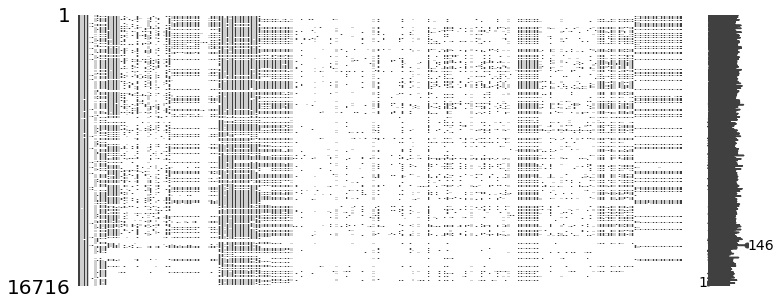

In [8]:
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

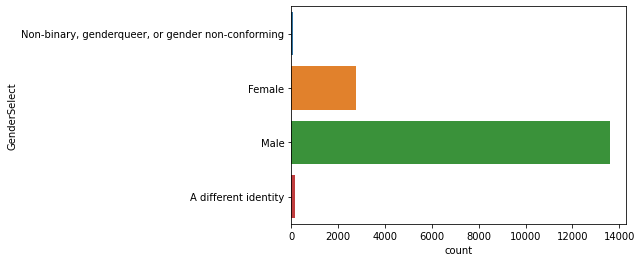

In [9]:
#성별
sns.countplot(y='GenderSelect', data=mcq)

In [10]:
# 국가별 응답 수
con_df=pd.DataFrame(mcq['Country'].value_counts())
con_df['국가']=con_df.index
con_df.columns=['응답 수','국가']
con_df=con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [11]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

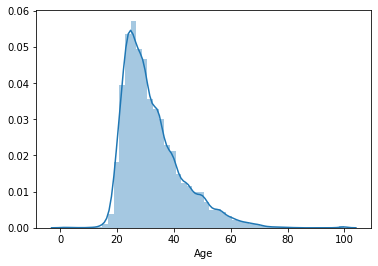

In [12]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

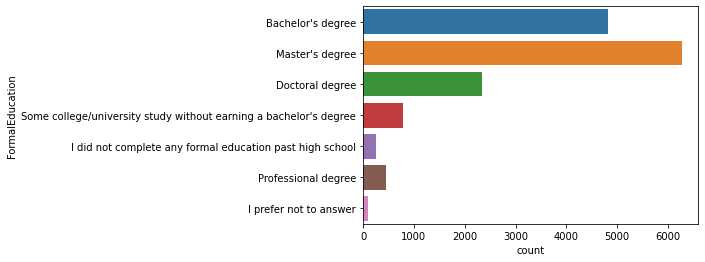

In [13]:
sns.countplot(y='FormalEducation', data=mcq)

In [14]:
#전공
mcq_major_count=pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent=pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df=mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns=['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


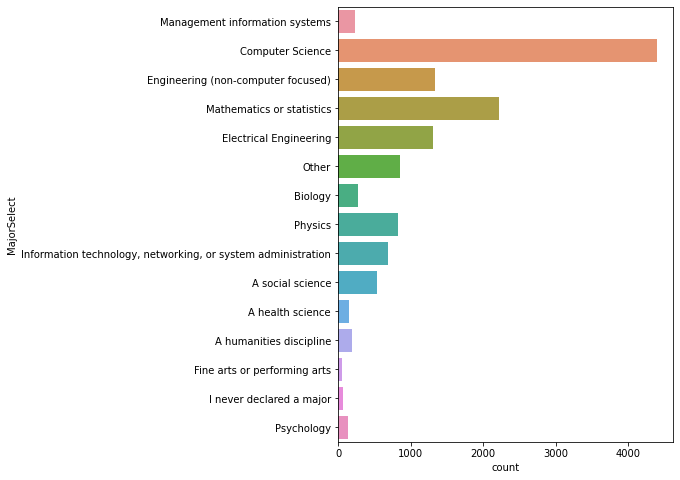

In [15]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

In [16]:
#취업 여부
mcq_es_count=pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent=pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df=mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns=['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


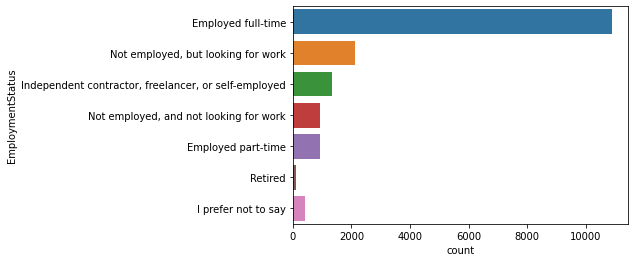

In [17]:
sns.countplot(y='EmploymentStatus',data=mcq)

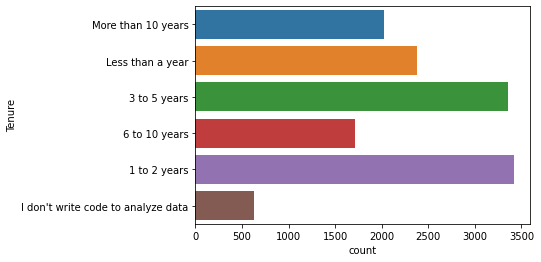

In [18]:
#프로그래밍 경험
sns.countplot(y='Tenure',data=mcq)

The number of interviewees in Korea: 194


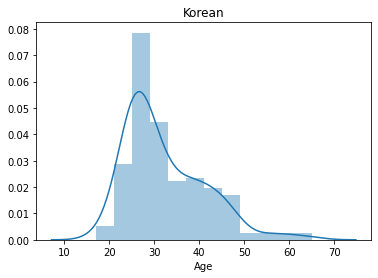

In [19]:
korea=mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: '+str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [20]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

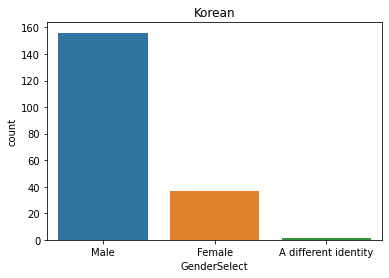

In [21]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

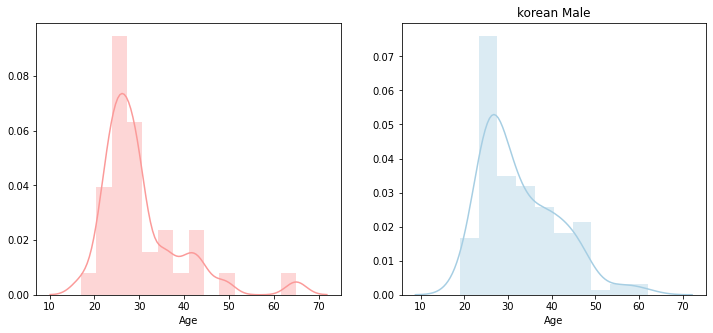

In [22]:
figure, (ax1,ax2)=plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

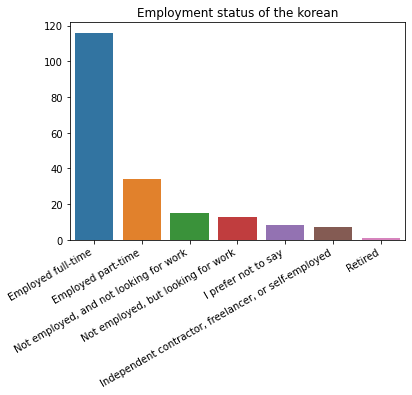

In [23]:
sns.barplot(x=korea['EmploymentStatus'].unique(),y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation=30,ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

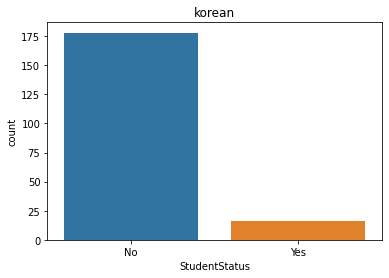

In [24]:
#학생인지 아닌지-대부분 일을 하니 학생의 수 적음
korea['StudentStatus']=korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus',data=korea)
plt.title('korean')
plt.show()

In [25]:
full_time=mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(full_time.shape)
looking_for_job=mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


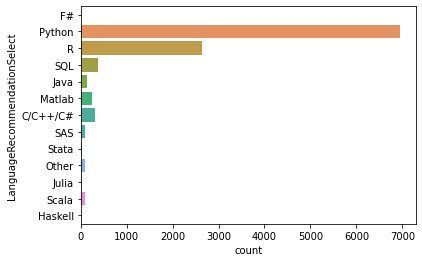

In [26]:
#자주 묻는....FAQ
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

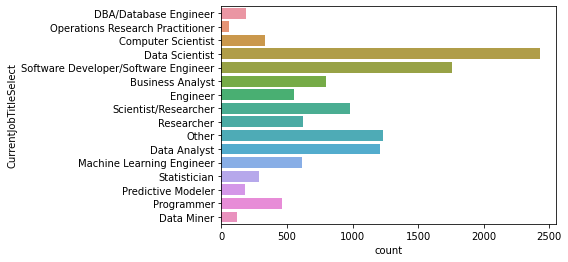

In [27]:
#현재하는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [28]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


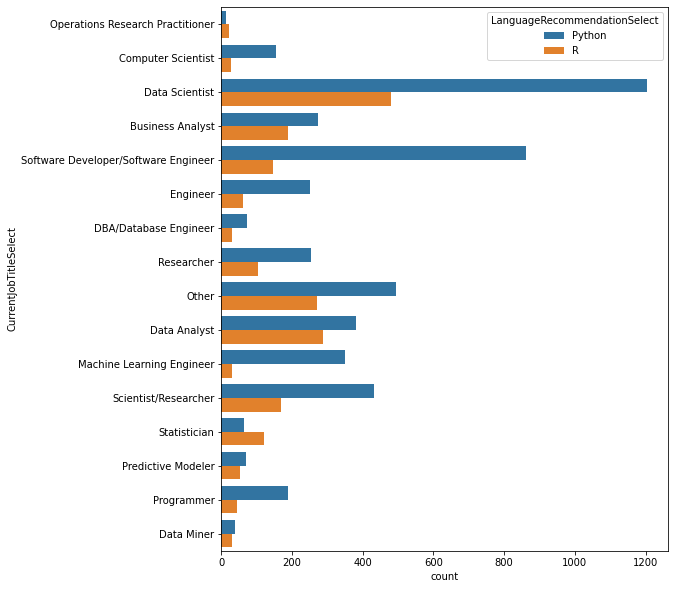

In [29]:
#응답자 중 python&r
data=mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect']=='Python') | (mcq['LanguageRecommendationSelect']=='R'))]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

In [30]:
#데이터 사이언스 툴
mcq_ml_tool_count=pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent=pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df=mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns=['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


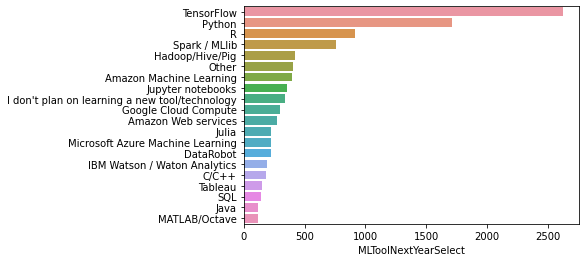

In [31]:
data=mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

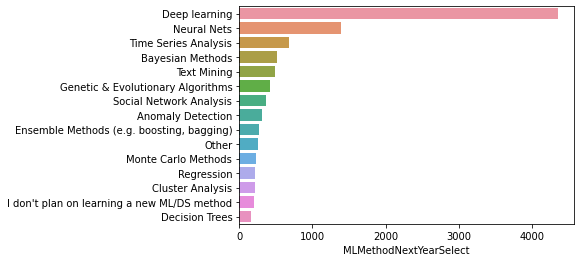

In [32]:
#Data Science Methods
data=mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [33]:
#where learn ds platform
mcq['LearningPlatformSelect']=mcq['LearningPlatformSelect'].astype('str')
s=mcq.apply(lambda x:pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name='platform'

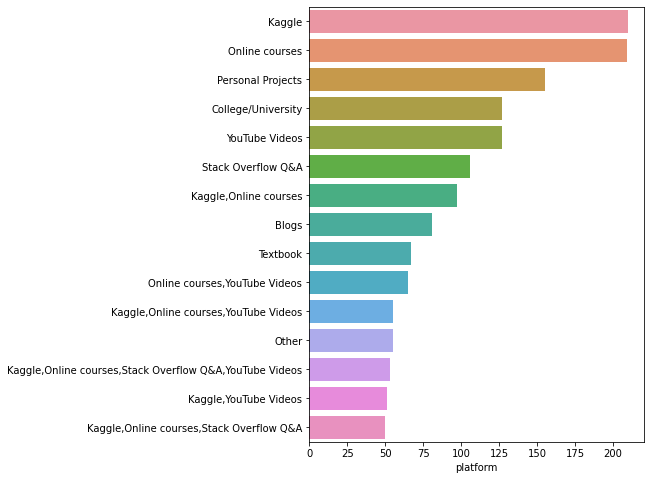

In [34]:
plt.figure(figsize=(6,8))
data=s[s!='nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [35]:
qc=question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [36]:
use_features=[x for x in mcq.columns if x.find('LearningPlatformUsefulness')!=-1]

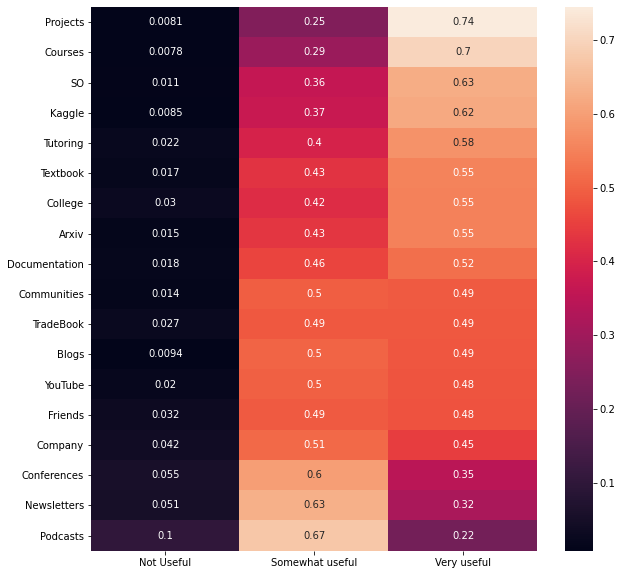

In [37]:
#플랫폼과 유용함의 연관성
fdf={}
for feature in use_features:
  a=mcq[feature].value_counts()
  a=a/a.sum()
  fdf[feature[len('LearningPlatformUsefulness'):]]=a

fdf=pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

#그림
plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values('Very useful', ascending=False), annot=True)

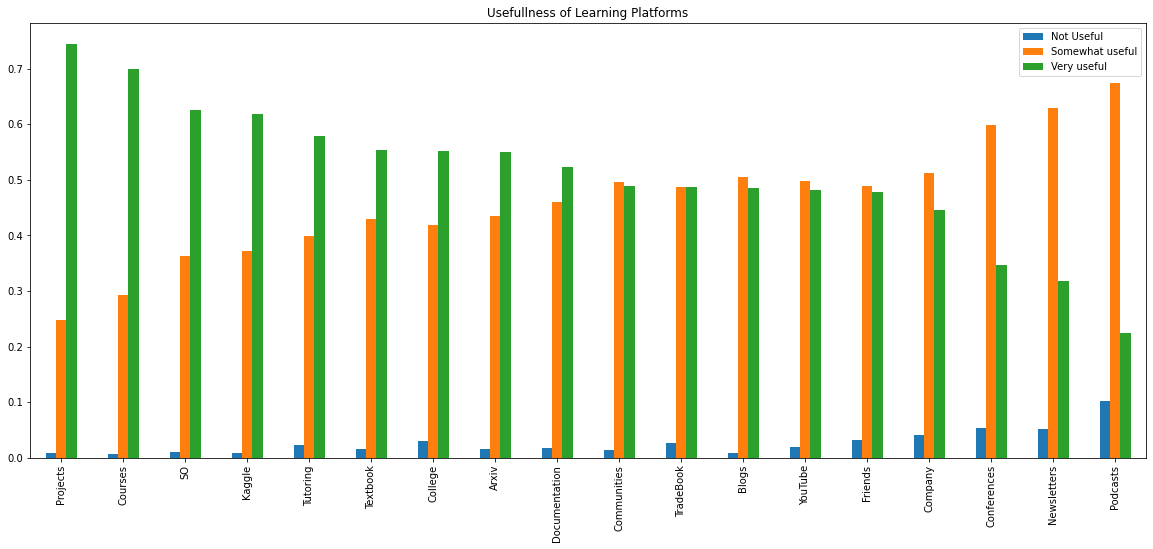

In [38]:
#유용함 정도
fdf.plot(kind='bar', figsize=(20,8), title='Usefullness of Learning Platforms')

In [39]:
cat_features=[x for x in mcq.columns if x.find('LearningCategory')!=-1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [40]:
cdf={}
for feature in cat_features:
  cdf[feature[len('LearningCategory'):]]=mcq[feature].mean()

cdf=pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

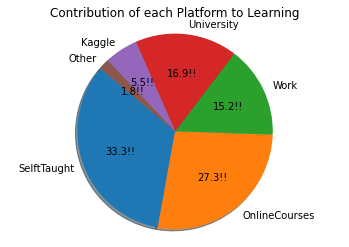

In [41]:
#플랫폼 별 도움되는 정도
plt.pie(cdf, labels=cdf.index, autopct='%1.1f!!', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

In [42]:
#컴퓨터 사양?
#설문 내용 및 대상
qc=question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [43]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [44]:
mcq['HardwarePersonalProjectsSelect']=mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x:x.split(','))
s=mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name='hardware'

In [45]:
s=s[s!='nan']

In [46]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


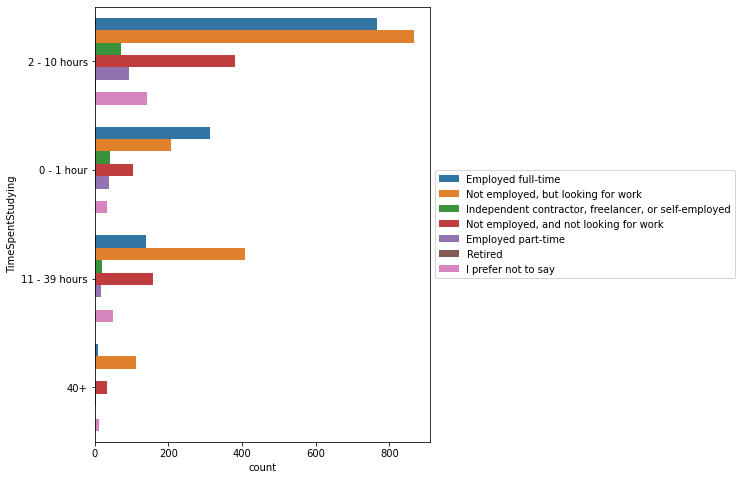

In [47]:
#공부 시간
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1,0.5))

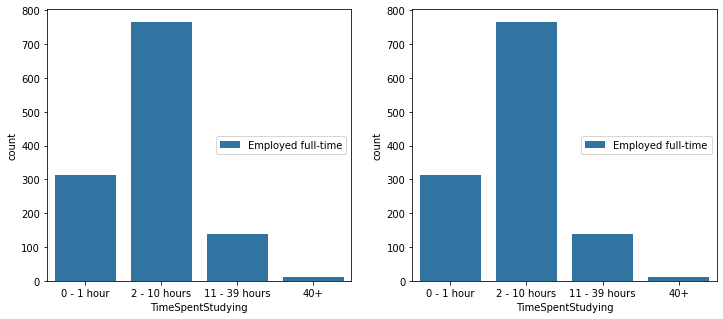

In [48]:
figure, (ax1,ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus', ax=ax1).legend(loc='center right', bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus', ax=ax2).legend(loc='center right',bbox_to_anchor=(1,0.5))

In [49]:
#블로그, 팟캐스트, 수업 등 추천할만한 것이 있는가?
mcq['BlogsPodcastsNewslettersSelect']=mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x:x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [50]:
s=mcq.apply(lambda x:pd.Series(x['BlogsPodcastsNewslettersSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name='platform'
s.head()


0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platform, dtype: object

In [51]:
s=s[s!='nan'].value_counts().head(20)

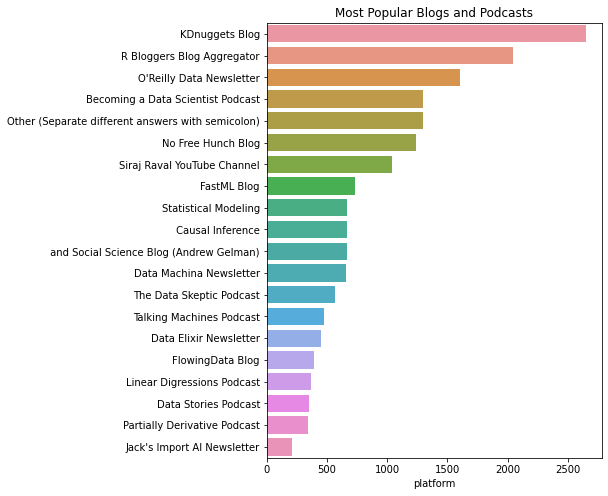

In [52]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

In [53]:
mcq['CoursePlatformSelect']=mcq['CoursePlatformSelect'].astype('str').apply(lambda x:x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [54]:
t=mcq.apply(lambda x:pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
t.name='courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [55]:
t=t[t!='nan'].value_counts()

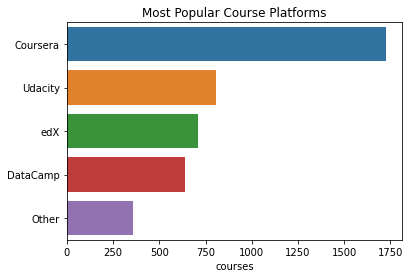

In [56]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)
#코세라 앤드류 융 교수님 강의 훌륭

In [57]:
#데이터사이언스 직무에서 중요한 스킬?
job_features=[x for x in mcq.columns if x.find('JobSkillImportance')!=-1 and x.find('JobSkillImportanceOther')==-1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [58]:
jdf={}
for feature in job_features:
  a=mcq[feature].value_counts()
  a=a/a.sum()
  jdf[feature[len('JobSkillImportance'):]]=a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [59]:
jdf=pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


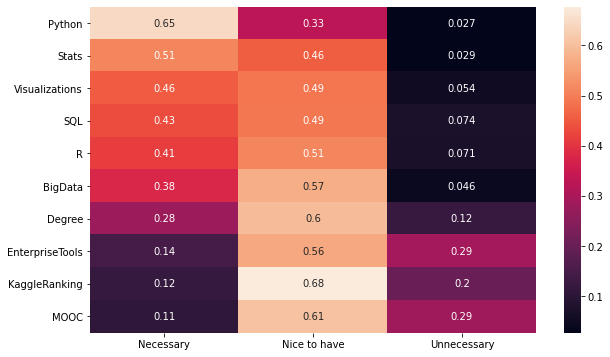

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary",ascending=False),annot=True)

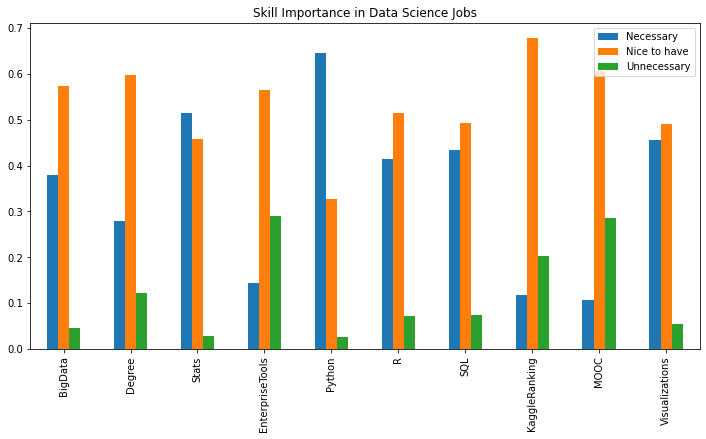

In [61]:
jdf.plot(kind='bar',figsize=(12,6),title="Skill Importance in Data Science Jobs")

In [62]:
#평균급여
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [63]:
mcq['CompensationAmount']=mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount']=mcq['CompensationAmount'].str.replace('-','')

#환율
rates=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)

salary=mcq[['CompensationAmount', 'CompensationCurrency', 'GenderSelect','Country', 'CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates, left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [64]:
 print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
 print('Minimum Salary is USD $', salary['Salary'].dropna().astype(int).min())
 print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

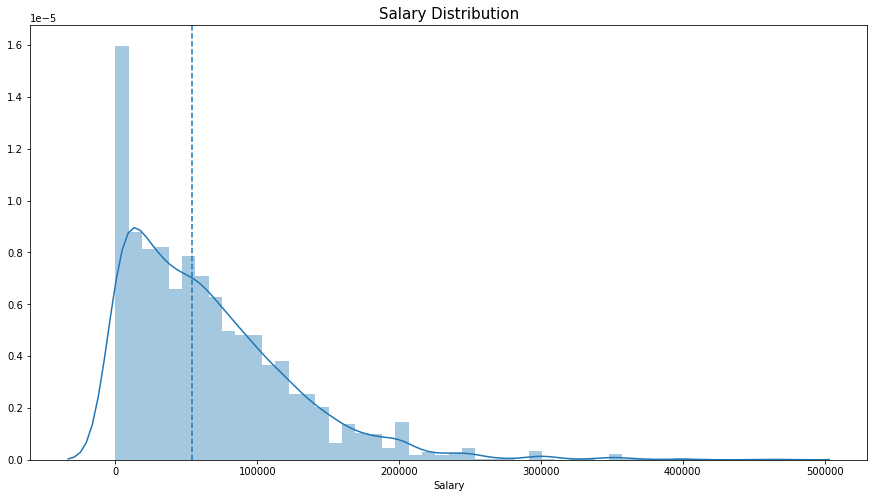

In [65]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution', size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

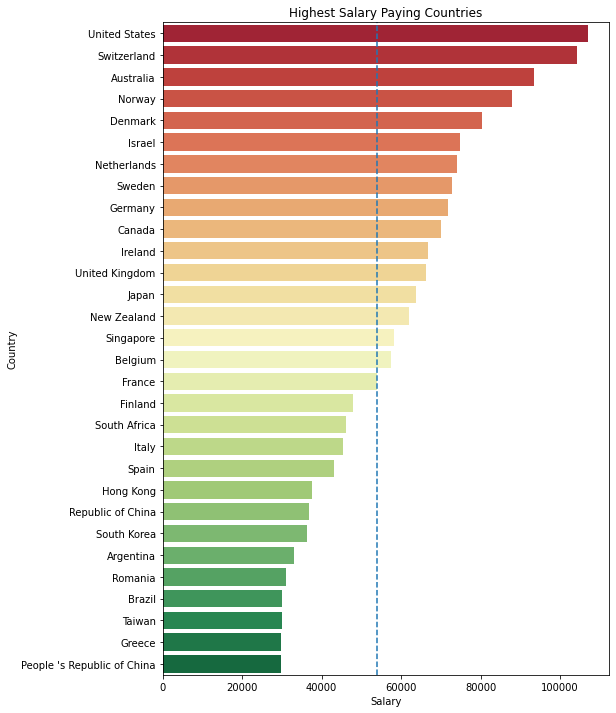

In [66]:
plt.subplots(figsize=(8,12))

sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()

sns.barplot('Salary',sal_coun.index, data=sal_coun, palette='RdYlGn')

plt.axvline(salary['Salary'].median(),linestyle='dashed')
plt.title('Highest Salary Paying Countries')

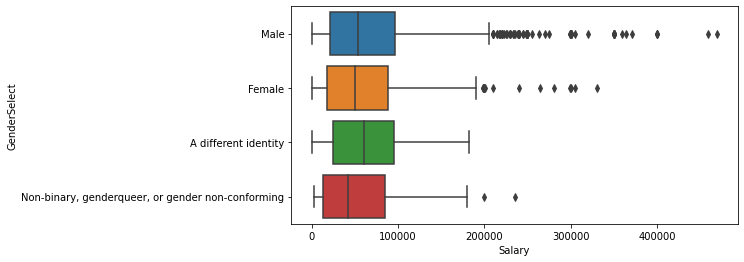

In [67]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

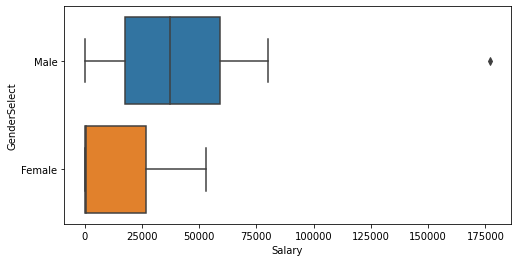

In [68]:
salary_k=salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary_k)

In [69]:
salary_k.shape

(26, 8)

In [70]:
salary_k[salary_k['GenderSelect']=='Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [71]:
salary_k_m=salary_k[salary_k['GenderSelect']=='Male']
salary_k_m['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [72]:
salary_k_m

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


In [73]:
#개인프로젝트나 학습용 데이터를 어디에서?

mcq['PublicDatasetsSelect']=mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))

In [74]:
q=mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']),axis=1).stack().reset_index(level=1,drop=True)
q.name='courses'

In [75]:
q=q[q!='nan'].value_counts()

In [76]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


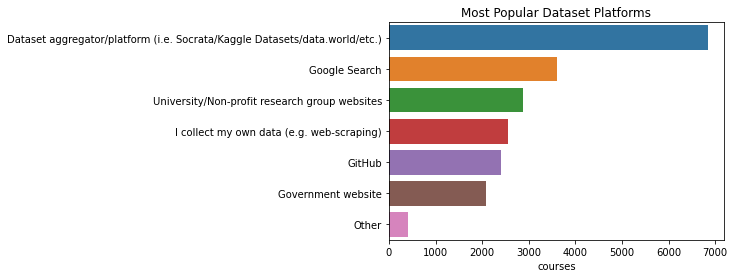

In [77]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

In [78]:
#주관식 응답
ff=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [79]:
qc=question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [80]:
ppcff=ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name='응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
Size,9
-,9


In [81]:
#ds업무에서 가장 많은 시간을 필요로하는 일
time_features=[x for x in mcq.columns if x.find('Time')!=-1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



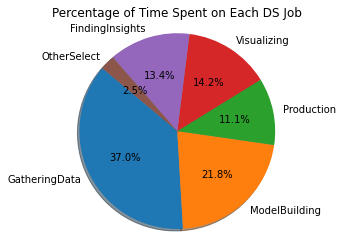

In [82]:
tdf={}
for feature in time_features:
  tdf[feature[len('Time'):]]=mcq[feature].mean()

tdf=pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()